****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lire le fichier depuis l'environnement Colab
df = pd.read_excel("MG.xlsx")

# Afficher un aperçu des données
df.head()


,Produit,Marque,Prix,Prix_avant_remise,Taille,Pourcentage,magasin,Code_Produit,id_entreprise,Date_D_Achat,Quantite_Achetee
0,Boisson gazeuse,VIVA,2.10,2.49,1L,-16%,MG,M-1501,3,30/09/2023,3
1,Boisson gazeuse,TROPICO,2.10,2.49,1L,-16%,MG,M-1502,3,22/01/2023,4
2,Boisson gazeuse,RAOUA,2.10,2.49,1L,-16%,MG,M-1503,3,01/03/2024,4
3,Boisson gazeuse,VIVA,1.15,1.33,24 cl,-14%,MG,M-1504,3,23/01/2023,2
4,Boisson gazeuse,RAOUA,1.15,1.33,24 cl,-14%,MG,M-1505,3,31/05/2024,3


In [3]:
df["Prix"] = df["Prix"].fillna(df["Prix"].mean())
df["Prix_avant_remise"] = df["Prix_avant_remise"].fillna(df["Prix_avant_remise"].mean())
# Imputer les valeurs manquantes sans utiliser inplace=True
df['Quantite_Achetee'] = df['Quantite_Achetee'].fillna(df['Quantite_Achetee'].mean())
df['Produit'] = df['Produit'].fillna(df['Produit'].mode()[0])
df['Marque'] = df['Marque'].fillna(df['Marque'].mode()[0])
df['Pourcentage'] = df['Pourcentage'].fillna(df['Pourcentage'].mode()[0])
df['Taille'] = df['Taille'].fillna(df['Taille'].mode()[0])
# Vérifier les NaN après traitement
print("Après traitement des NaN:")
print(df.isna().sum())


Après traitement des NaN:
Produit              0
Marque               0
Prix                 0
Prix_avant_remise    0
Taille               0
Pourcentage          0
magasin              0
Code_Produit         0
id_entreprise        0
Date_D_Achat         0
Quantite_Achetee     0
dtype: int64


DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/cbe2i8pt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/cp74l6ux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7068', 'data', 'file=/tmp/tmphxz0bn39/cbe2i8pt.json', 'init=/tmp/tmphxz0bn39/cp74l6ux.json', 'output', 'file=/tmp/tmphxz0bn39/prophet_model0nnv2rr7/prophet_model-20250329213431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


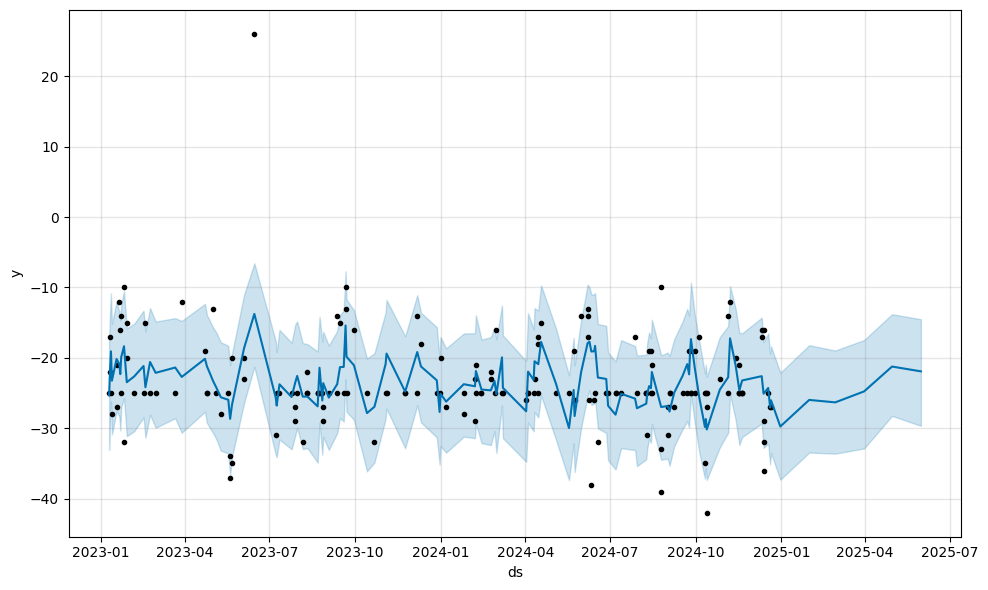

            ds       yhat  yhat_lower  yhat_upper
119 2024-12-31 -29.745205  -37.292375  -22.106411
120 2025-01-31 -25.973025  -33.444824  -18.198088
121 2025-02-28 -26.320819  -33.604282  -18.956045
122 2025-03-31 -24.763014  -32.860550  -17.468130
123 2025-04-30 -21.235047  -28.247338  -13.796976
124 2025-05-31 -21.918025  -29.645390  -14.516816


In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Copier le dataset original pour éviter de modifier les noms des colonnes d'origine
df_prophet = df.copy()

# Vérifier si la colonne 'Pourcentage' contient des valeurs mal formatées (ex: "-16%") et les corriger
df_prophet['Pourcentage'] = df_prophet['Pourcentage'].astype(str).str.replace('%', '', regex=True).astype(float)

# Renommer les colonnes pour Prophet
df_prophet = df_prophet.rename(columns={"Date_D_Achat": "ds", "Pourcentage": "y"})

# Vérifier le format des dates
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], dayfirst=True)

# Instancier et entraîner le modèle Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# Créer un futur dataframe pour prédire les 6 prochains mois
future = model.make_future_dataframe(periods=6, freq='M')

# Prédictions
forecast = model.predict(future)

# Afficher le graphique des prévisions
fig = model.plot(forecast)
plt.show()

# Afficher les prévisions des 6 prochains mois
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))


In [11]:
# Définir les jours fériés en Tunisie (exemple)
holidays = pd.DataFrame({
    'ds': pd.to_datetime([
        '2024-01-01', '2024-03-20', '2024-04-09', '2024-05-01',  # Nouvel An, Indépendance, Martyrs, Fête du Travail
        '2024-07-25', '2024-08-13', '2024-10-15', '2024-12-17',  # République, Femme, Évacuation, Révolution
    ]),
    'holiday': ['New Year', 'Independence Day', 'Martyrs Day', 'Labour Day',
                'Republic Day', 'Women’s Day', 'Evacuation Day', 'Revolution Day']
})

# Ajouter les jours fériés au modèle Prophet
model = Prophet(holidays=holidays)
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/9cxkpz2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/glfgtg9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1441', 'data', 'file=/tmp/tmphxz0bn39/9cxkpz2h.json', 'init=/tmp/tmphxz0bn39/glfgtg9w.json', 'output', 'file=/tmp/tmphxz0bn39/prophet_modela551k6nm/prophet_model-20250329213729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:37:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,   # Variations annuelles (ex: soldes d’été et d’hiver)
    weekly_seasonality=True,   # Variations hebdomadaires (ex: week-end vs semaine)
    daily_seasonality=False    # Pas utile ici car on prédit par mois
)

# Ajouter des tendances mensuelles spécifiques
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/e1br7ima.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/xq87zspm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9955', 'data', 'file=/tmp/tmphxz0bn39/e1br7ima.json', 'init=/tmp/tmphxz0bn39/xq87zspm.json', 'output', 'file=/tmp/tmphxz0bn39/prophet_modelq3cgc401/prophet_model-20250329213741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:37:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encoder les colonnes catégorielles
encoder_produit = LabelEncoder()
encoder_marque = LabelEncoder()
encoder_taille = LabelEncoder()

df_prophet['Produit'] = encoder_produit.fit_transform(df['Produit'])
df_prophet['Marque'] = encoder_marque.fit_transform(df['Marque'])
df_prophet['Taille'] = encoder_taille.fit_transform(df['Taille'])


In [25]:

model = Prophet(holidays=holidays)
model.add_regressor('Produit')
model.add_regressor('Marque')
model.add_regressor('Taille')

model.fit(df_prophet)


# Affichage des prévisions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)





INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/7m7hwew6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphxz0bn39/yda2yiy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52727', 'data', 'file=/tmp/tmphxz0bn39/7m7hwew6.json', 'init=/tmp/tmphxz0bn39/yda2yiy7.json', 'output', 'file=/tmp/tmphxz0bn39/prophet_modelh1q69u3t/prophet_model-20250329224217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:42:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:42:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
116,2024-12-18,-24.728127,-33.426819,-16.550177
117,2024-12-20,-25.700855,-34.438252,-17.022279
118,2024-12-21,-26.424258,-34.785493,-18.344897
119,2024-12-31,-25.885865,-34.480962,-17.237880
120,2025-01-31,-25.790494,-33.886116,-17.246585
121,2025-02-28,-25.850254,-34.573503,-17.522315
122,2025-03-31,-24.968219,-33.490480,-16.122053
123,2025-04-30,-25.011984,-33.656858,-16.974733
124,2025-05-31,-26.767875,-35.350903,-18.477314


In [26]:
#Générer les prochaines dates
future = model.make_future_dataframe(periods=6, freq='M')

# Ajouter les régressors (Important !)
future['Produit'] = df_prophet['Produit'].iloc[-1]
future['Marque'] = df_prophet['Marque'].iloc[-1]
future['Taille'] = df_prophet['Taille'].iloc[-1]

# Faire la prédiction
forecast = model.predict(future)



/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


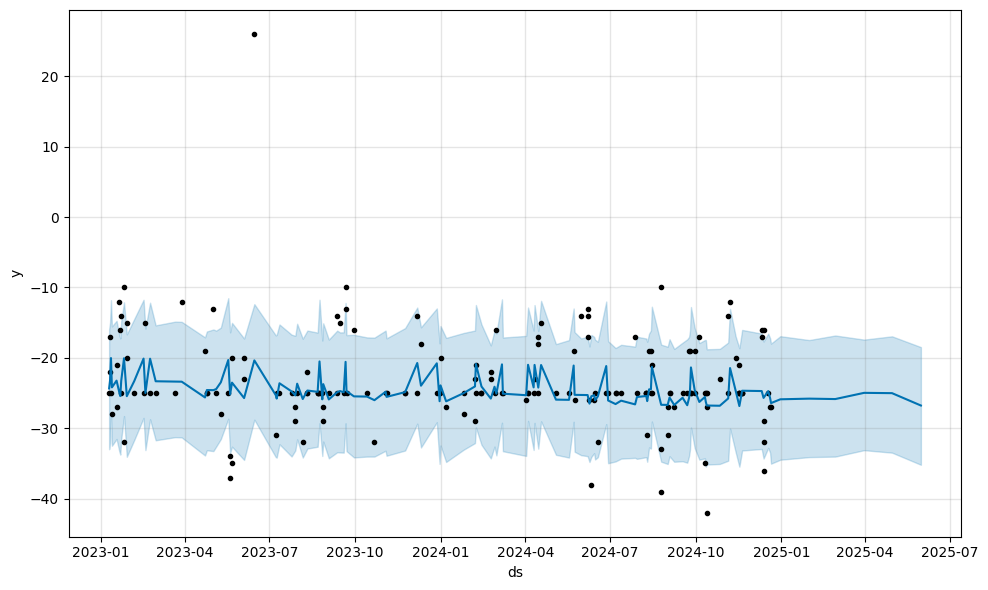

In [27]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.show()

In [20]:
print (df_copy.head())

            Produit   Marque  Prix  Prix_avant_remise Taille  Pourcentage  \
0   Boisson gazeuse     VIVA  2.10               2.49     1L        -16.0   
1   Boisson gazeuse  TROPICO  2.10               2.49     1L        -16.0   
2   Boisson gazeuse    RAOUA  2.10               2.49     1L        -16.0   
3  Boisson gazeuse      VIVA  1.15               1.33  24 cl        -14.0   
4  Boisson gazeuse     RAOUA  1.15               1.33  24 cl        -14.0   

  magasin Code_Produit  id_entreprise Date_D_Achat  Quantite_Achetee  
0      MG       M-1501              3   30/09/2023                 3  
1      MG       M-1502              3   22/01/2023                 4  
2      MG       M-1503              3   01/03/2024                 4  
3      MG       M-1504              3   23/01/2023                 2  
4      MG       M-1505              3   31/05/2024                 3  
